In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
import enum
import sys


# Enums

In [23]:
class TypeOfLearningRate(enum.Enum):
    const = 0
    timeBased = 1


class ConditionOfDichotomy(enum.Enum):
    normal = 0
    wolfe = 1

# Configuring constants

In [24]:
minValue = -10
maxValue = 10
totalNumber = 1000

eps = 10**-9
delta = 0.1 * eps
deltaDiff = 10**-9
c1 = 0.1
c2 = 1 - c1
sys.setrecursionlimit(5000)

## Functions
$f(x, y) = x^2 y^2 + 3xy - 5$ <br>
$1. \quad f(x, y) = x^2 + y^2$ <br>
$2. \quad f(x, y) = x^2 + (y - x)^2$ <br>
$3. \quad f(x, y) = x^2 + y^2 + xy$

In [25]:
def function(x, y):
    return x**2 * y**2 + 3 * x * y - 5

def dxFunction(x, y, abstractFunction):
    return (abstractFunction(x + deltaDiff, y) - abstractFunction(x, y)) / deltaDiff

def dyFunction(x, y, abstractFunction):
    return (abstractFunction(x, y + deltaDiff) - abstractFunction(x, y)) / deltaDiff
  
def function1(x, y):
    return x**2 + y**2

def function2(x, y):
    return x**2 + (y - x)**2

def function3(x, y):
    return x**2 + y**2 + x*y

def gradient(x, y, abstractFunction):
    return np.array([dxFunction(x, y, abstractFunction), dyFunction(x, y, abstractFunction)])

def phi(startPoint, p, alpha, abstractFunction):
    x = startPoint[0]
    y = startPoint[1]
    px = p[0]
    py = p[1]
    return abstractFunction(x - alpha * px, y - alpha * py)

def nextPoint(coordinates, lr, abstractFunction):
    x = coordinates[0]
    y = coordinates[1]
    return coordinates - lr * gradient(x, y, abstractFunction)

def checkIfLessThanEps(a, b):
    square = np.square(a - b)
    sumSquare = np.sum(square)
    distance = np.sqrt(sumSquare)
    return distance < eps

def getGraph(pointOfDescent, abstractFunction):
    fig = plt.figure()
    fig.set_size_inches(10, 10)
    ax = plt.axes(projection='3d')
    x = np.linspace(minValue, maxValue, totalNumber)
    y = np.linspace(minValue, maxValue, totalNumber)
    x, y = np.meshgrid(x, y)
    z = abstractFunction(x, y)
    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, alpha=0.7)
    xD, yD = [], []
    for xi, yi in pointOfDescent:
        xD.append(xi)
        yD.append(yi)
    xD = np.array(xD)
    yD = np.array(yD)
    zD = abstractFunction(xD, yD)
    for i in range(1, len(xD)):
        ax.plot([xD[i], xD[i - 1]], [yD[i], yD[i - 1]], zs=[zD[i], zD[i - 1]], color='red')
    ax.scatter(xD[0], yD[0], zD[0], linewidths=3, color='red')
    ax.scatter(xD[len(xD) - 1], yD[len(yD) - 1], zD[len(zD) - 1], linewidths=3, color='red')
    plt.show()

## GDS (Task 1-2)
Gradient descent calculates gradient value on each iteration 
depending on the type of changing learning rate, algorithm either leaves it still (constant value of learning rate) or changes basing on the number of iterations, the formula is: <br>
$lr = lr \cdot \dfrac{1}{1 + decay \cdot ind}$, where $\textbf{decay}$ is some constant, and $\textbf{ind}$ is current number of iteration <br>
The stopping criteria is situation, where absolute difference between neighbour values of function is lower than some epsilon: $eps = 10^{-6}$ <br> <br>
found() - runs GDS several times to see, which decay fits the most <br>
Decay changes from one epoch to another by formula: $decay = \dfrac{lr}{epoch}$ <br>
This means that the next epoch of GDS will be more accurate, but it's more likely to calculate longer


In [26]:
def gradientDescent(lr, decay, typeOfLearningRate, startingPoint, abstractFunction):
    descentPoints = []
    descentPoints.append(startingPoint)
    descentPoints.append(nextPoint(descentPoints[0], lr, abstractFunction))
    ind = 1
    while not checkIfLessThanEps(descentPoints[ind - 1], descentPoints[ind]):
        if typeOfLearningRate == TypeOfLearningRate.timeBased:
            lr *= (1. / (1. + decay * ind))
        descentPoints.append(nextPoint(descentPoints[ind], lr, abstractFunction))
        ind += 1
    # print("Gradient descent finished at the point of: ", descentPoints[ind], "decay = ", decay)
    # print("Number of iterations: ", ind)
    return (descentPoints, ind)

def found(startingPoint, abstractFunction, typeOfLearningRate):
    minRes = 100
    points = []
    for epoch in range(1, 100):
        lr = 0.02
        decay = lr / epoch
        points, res = gradientDescent(lr, decay, typeOfLearningRate, startingPoint, abstractFunction)
        if minRes > res:
            minRes = res
    print("GDS finished at:", points[len(points) - 1], "within", len(points), "iterations")
    getGraph(points, abstractFunction)
    return (minRes, decay)

### Execution of GDS on function $\quad f(x, y) = x^2 y^2 + 3xy - 5$
First goes constant learning rate, then time based

GDS finished at: [-2.11657018  0.70869358] within 83 iterations
GDS finished at: [-2.10778119  0.71164872] within 144 iterations


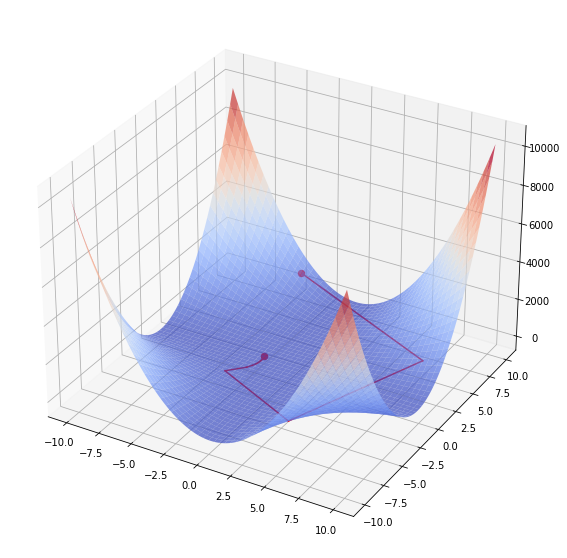

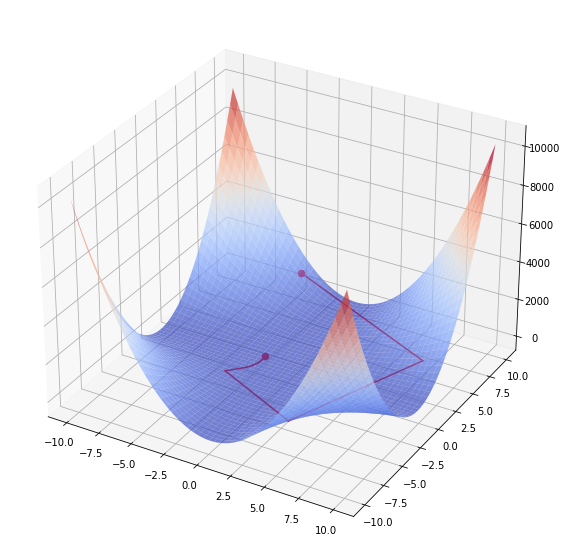

(50, 0.00020202020202020202)

In [27]:
startingPoint = np.array([random.randint(minValue, maxValue), random.randint(minValue, maxValue)])
found(startingPoint, function, TypeOfLearningRate.const)
found(startingPoint, function, TypeOfLearningRate.timeBased)

### Execution of GDS on function1 $\quad f(x, y) = x^2 + y^2$
First goes constant learning rate, then time based

GDS finished at: [-1.01800856e-08  2.12801906e-08] within 487 iterations
GDS finished at: [-0.11020953  0.24797147] within 408 iterations


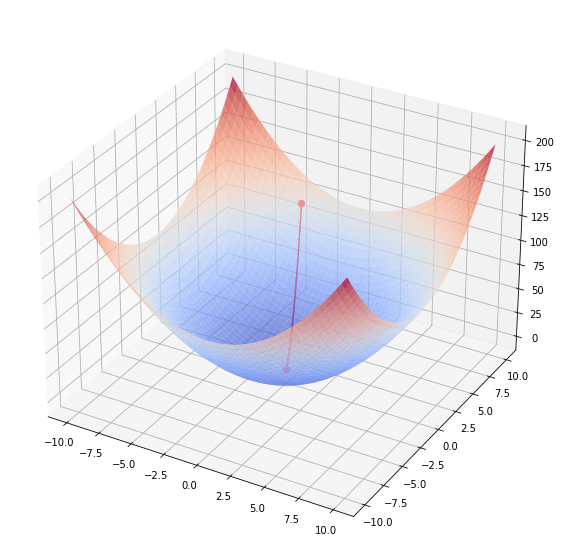

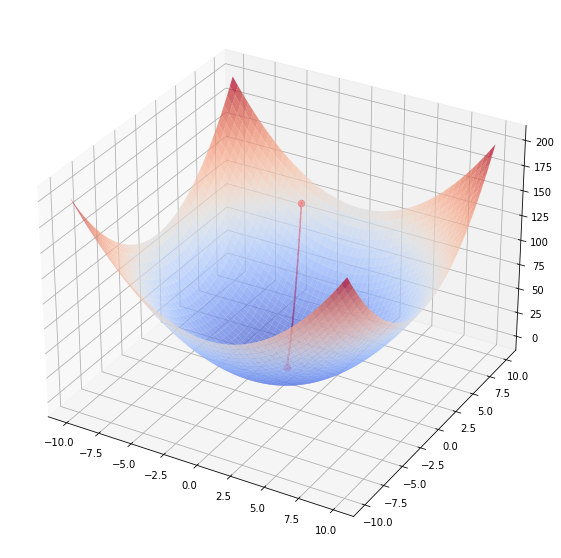

(51, 0.00020202020202020202)

In [28]:
found(startingPoint, function1, TypeOfLearningRate.const)
found(startingPoint, function1, TypeOfLearningRate.timeBased)

### Execution of GDS on function2 $\quad f(x, y) = x^2 + (y - x)^2$
First goes constant learning rate, then time based

GDS finished at: [3.22475540e-08 5.26046894e-08] within 1188 iterations
GDS finished at: [0.74903787 1.21298258] within 417 iterations


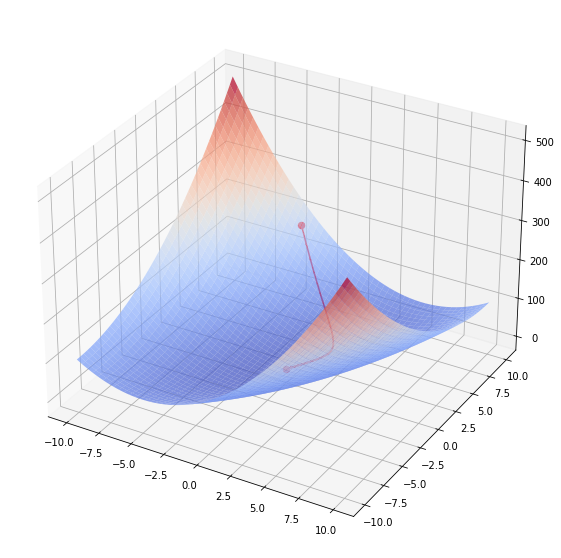

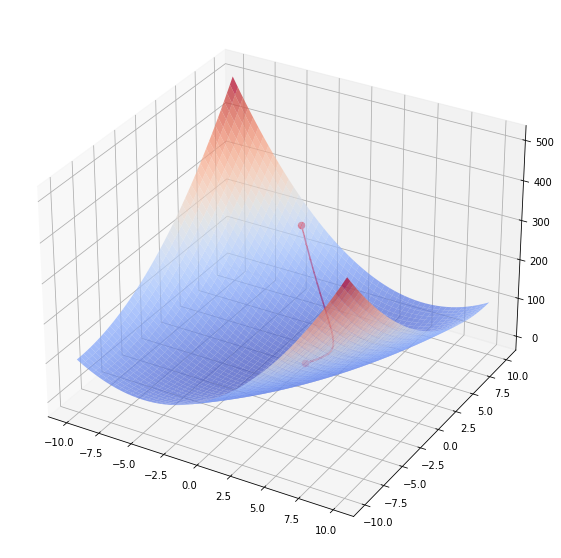

(51, 0.00020202020202020202)

In [29]:
found(startingPoint, function2, TypeOfLearningRate.const)
found(startingPoint, function2, TypeOfLearningRate.timeBased)

### Execution of GDS on function3 $\quad f(x, y) = x^2 + y^2 + xy$
First goes constant learning rate, then time based

GDS finished at: [-3.49354463e-08  3.42687797e-08] within 944 iterations
GDS finished at: [-1.08197608  1.10395394] within 421 iterations


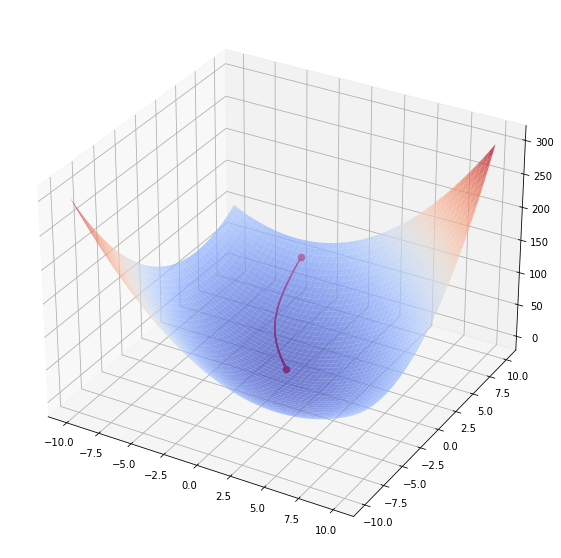

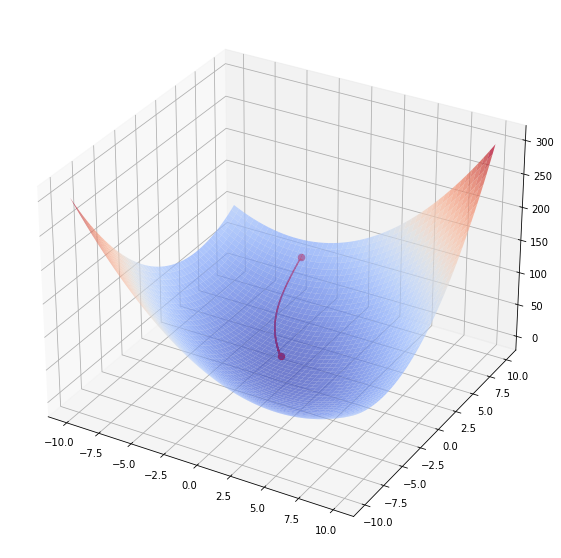

(51, 0.00020202020202020202)

In [30]:
found(startingPoint, function3, TypeOfLearningRate.const)
found(startingPoint, function3, TypeOfLearningRate.timeBased)

# Dichotomy and Wolfe condition (Task 3-4)
The main idea is to find new learning rate constant on every iteration using one-dimensional search
and using this alpha do the next iteration of GDS.

In [31]:
def dichotomy(a, b, startPoint, p, abstractFunction, condition):
    middle = (a + b) / 2
    if (condition == ConditionOfDichotomy.normal):
        if (abs(a - b) < eps):
            return middle
    else:
        if (wolfeConditions(abstractFunction, startPoint, middle, p)):
            return middle
    x1 = middle - delta
    x2 = middle + delta
    if (phi(startPoint, p, x1, abstractFunction) < phi(startPoint, p, x2, abstractFunction)):
        return dichotomy(a, x2, startPoint, p, abstractFunction, condition)
    elif (phi(startPoint, p, x1, abstractFunction) > phi(startPoint, p, x2, abstractFunction)):
        return dichotomy(x1, b, startPoint, p, abstractFunction, condition)
    else:
        return dichotomy(x1, x2, startPoint, p, abstractFunction, condition)

def findSegment(startPoint, abstractFunction, condition):
    phi0 = abstractFunction(startPoint[0], startPoint[1])
    p = gradient(startPoint[0], startPoint[1], abstractFunction)
    alpha = 0.0001
    phi1 = phi(startPoint, p, alpha, abstractFunction)
    if phi0 > phi1: 
        alpha *= 2
        phi2 = phi(startPoint, p, alpha, abstractFunction)
        while phi2 < phi1: 
            alpha *= 2
            phi2 = phi(startPoint, p, alpha, abstractFunction)
    res = dichotomy(0, alpha, startPoint, p, abstractFunction, condition)
    return startPoint - res * p
 
def gradientDescentDichotomy(startingPoint, abstractFunction, condition):
    descentPoints = []
    descentPoints.append(startingPoint)
    descentPoints.append(findSegment(startingPoint, abstractFunction, condition))
    ind = 1
    while not checkIfLessThanEps(descentPoints[ind - 1], descentPoints[ind]):
        segment = findSegment(descentPoints[ind], abstractFunction, condition)
        descentPoints.append(segment)
        ind += 1
    print("Gradient descent dichotomy finished at the point of: ", descentPoints[ind])
    print("Number of iterations: ", ind)
    getGraph(descentPoints, abstractFunction)

def wolfeConditions(abstractFunction, startPoint, alpha, p):
    point = startPoint - alpha * p
    return (abstractFunction(point[0], point[1]) <= abstractFunction(startPoint[0], startPoint[1]) + alpha * c1 * np.dot(p, -p)) \
           and (np.dot(gradient(point[0], point[1], abstractFunction), -p)) >= c2 * np.dot(p, -p)


### Execution of Dichotomy on function $\quad f(x, y) = x^2 y^2 + 3xy - 5$
1. simple condition
2. Wolfe condition

Gradient descent dichotomy finished at the point of:  [-0.28311589  5.29818437]
Number of iterations:  5
Gradient descent dichotomy finished at the point of:  [ 9.7846808  -0.15330087]
Number of iterations:  16


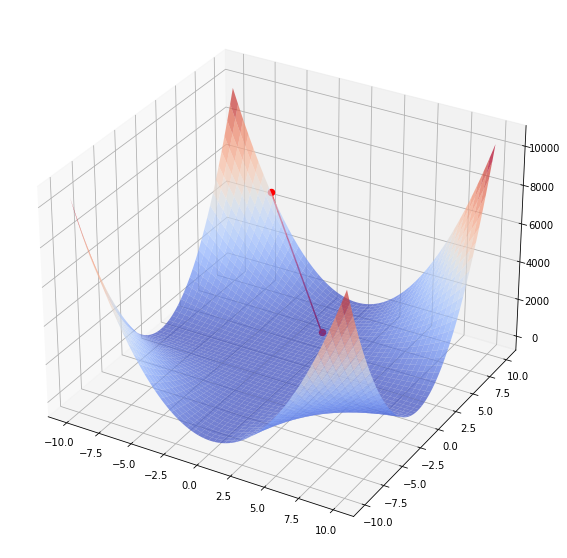

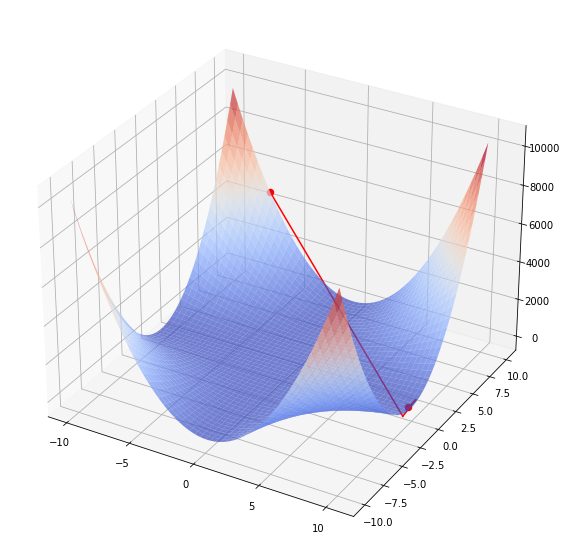

In [37]:
startingPoint = np.array([random.randint(minValue, maxValue), random.randint(minValue, maxValue)])
gradientDescentDichotomy(startingPoint, function, ConditionOfDichotomy.normal)
gradientDescentDichotomy(startingPoint, function, ConditionOfDichotomy.wolfe)

### Execution of Dichotomy on function1 $\quad f(x, y) = x^2 + y^2$
1. simple condition
2. Wolfe condition

Gradient descent dichotomy finished at the point of:  [ 7.05377027e-11 -1.00827753e-10]
Number of iterations:  3
Gradient descent dichotomy finished at the point of:  [-5.92709732e-10 -3.67557056e-10]
Number of iterations:  53


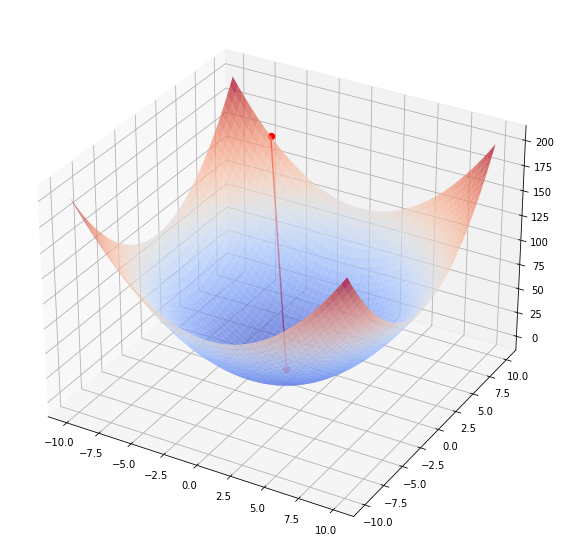

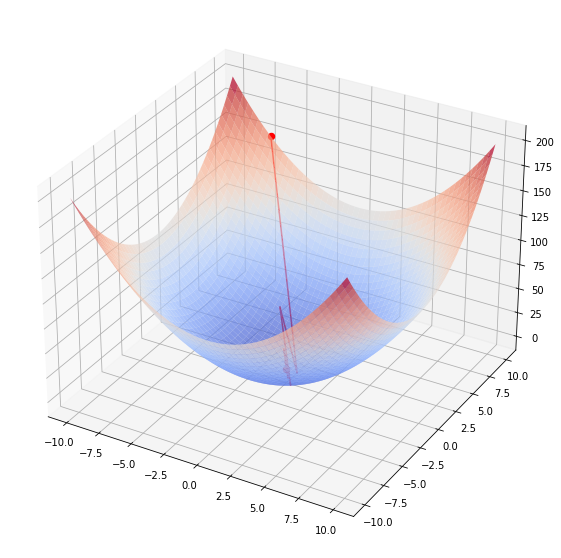

In [38]:
gradientDescentDichotomy(startingPoint, function1, ConditionOfDichotomy.normal)
gradientDescentDichotomy(startingPoint, function1, ConditionOfDichotomy.wolfe)

### Execution of Dichotomy on function2 $\quad f(x, y) = x^2 + (y - x)^2$
1. simple condition
2. Wolfe condition

Gradient descent dichotomy finished at the point of:  [2.02592997e-10 6.41386964e-10]
Number of iterations:  14
Gradient descent dichotomy finished at the point of:  [-2.56089915e-10 -1.69851323e-12]
Number of iterations:  39


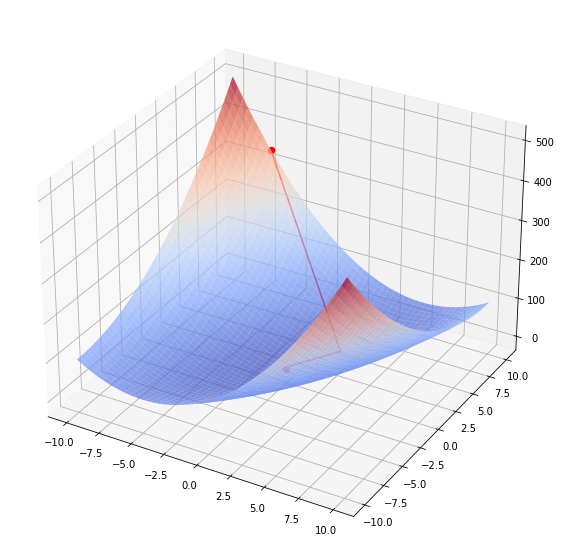

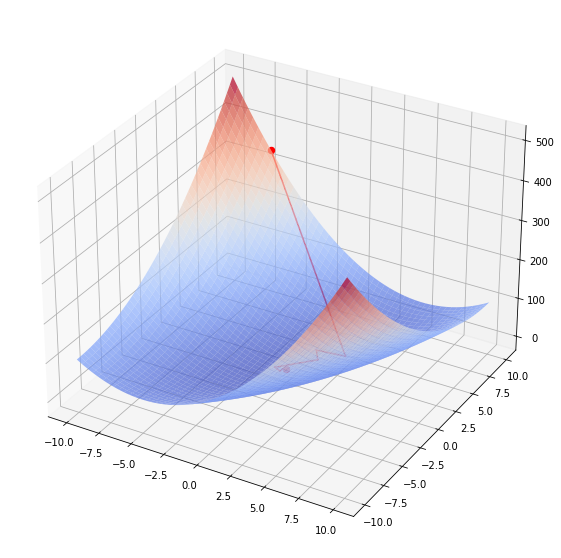

In [39]:
gradientDescentDichotomy(startingPoint, function2, ConditionOfDichotomy.normal)
gradientDescentDichotomy(startingPoint, function2, ConditionOfDichotomy.wolfe)

### Execution of Dichotomy on function3 $\quad f(x, y) = x^2 + y^2 + xy$
1. simple condition
2. Wolfe condition

Gradient descent dichotomy finished at the point of:  [-1.07785676e-10  1.01624011e-10]
Number of iterations:  29
Gradient descent dichotomy finished at the point of:  [-2.91195617e-10  6.78901460e-11]
Number of iterations:  27


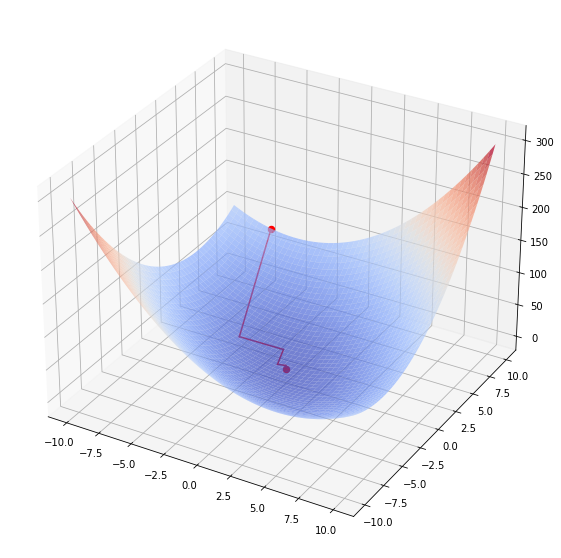

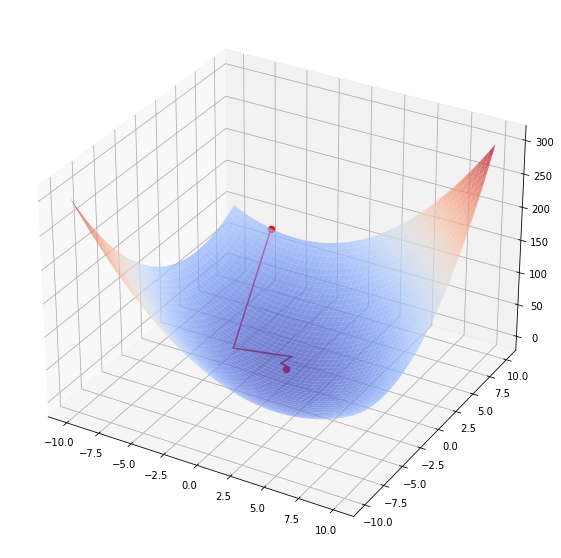

In [40]:
gradientDescentDichotomy(startingPoint, function3, ConditionOfDichotomy.normal)
gradientDescentDichotomy(startingPoint, function3, ConditionOfDichotomy.wolfe)

# Statistics (Task 5)

Если сравнивать константный шаг и основанный на количестве итераций, можно заметить закономерность.
Для градиентного спуска с постоянным шагом нужно больше итераций, это связано с тем, что в конце,
когда значение градиента относительно небольшое, шаг еще сильнее уменьшает его, но благодаря этому, градиентный спуск
с постоянным шагом точнее.

Сравнивая градиентный спуск на основе дихотомии с обычным, видно, что дихотомия намного быстрее
сходится к точке минимума, что и ожидалось.

Также стоит отметить, что дихотомия с обычным условием сходится быстрее, чем с условием Вольфе.
Скорее всего, так получается, потому что такая дихотомия делает первый шаг довольно близко к точке минимума.

Если сравнивать градиентный спуск в зависимости от начальных точек, видим, что дихотомия имеет
существенное преимущество, если дельта функции начальной точки и точки минимума сильно отличается,
потому что спуск с постоянным или ступенчатым шагом идет более плавно, чем дихотомия, соответственно
ему требуется больше итераций.